In [ ]:
import pandas as pd
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Herrar Tabell

In [125]:

# Ange sökvägen till filen
file_path = '/Users/wilmaberglund/pingisliganherrar.csv'

# Läs in CSV-filen
df = pd.read_csv(file_path)

# Dictionary över lag och deras sponsorer
sponsors = {
    'BTK Kävlinge': 'Joola',
    'Spårvägens BTK': 'Donic',
    'Eslövs AI BTK': 'Stiga',
    'Halmstad BTK': 'Stiga',
    'Söderhamns UIF': 'Stiga',
    'BTK Rekord': 'Stiga',
    'BTK Warta': 'Stiga',
    'Falkenbergs BTK': 'Stiga',
    'Frej Växjö': 'Yasaka',
    'Lyckeby BTK': 'Yasaka',
    'Munkedals BTK': 'Stiga',
    'Tibble Kungsängens BTK': 'Yasaka',
    'Västers BTK': 'Butterfly',
    'Ängby SK': 'Butterfly',
    'Österlens BTK': 'Butterfly'
    
}

# Lägg till en ny kolumn för sponsor
df['Sponsor'] = df['Lag'].map(sponsors)

# Visa de första raderna av data
df.head(16)



,Lag,Hemmavinst,Hemmaförlust,Bortavinst,Bortaförlust,Oavgjort Hemma,Oavgjort Borta,Säsong,Sponsor
0,Söderhamns UIF,7,0,4,3,0,0,2023/24,Stiga
1,Eslövs AI BTK,7,0,5,2,0,0,2023/2024,Stiga
2,BTK Rekord,5,2,4,3,0,0,2023/2024,Stiga
3,Spårvägens BTK,4,3,4,3,0,0,2023/2024,Donic
4,Halmstad BTK,2,5,3,4,0,0,2023/2024,Stiga
5,Munkedals BTK,2,5,4,3,0,0,2023/2024,Stiga
6,BTK Kävlinge,4,3,2,5,0,0,2023/2024,Joola
7,Lyckeby BTK,0,7,0,7,0,0,2023/2024,Yasaka
8,Söderhamns UIF,6,1,5,2,0,0,2022/2023,Stiga
9,Eslövs AI BTK,6,1,3,4,0,0,2022/2023,Stiga


# Beräkna Vinstprocent Herrar

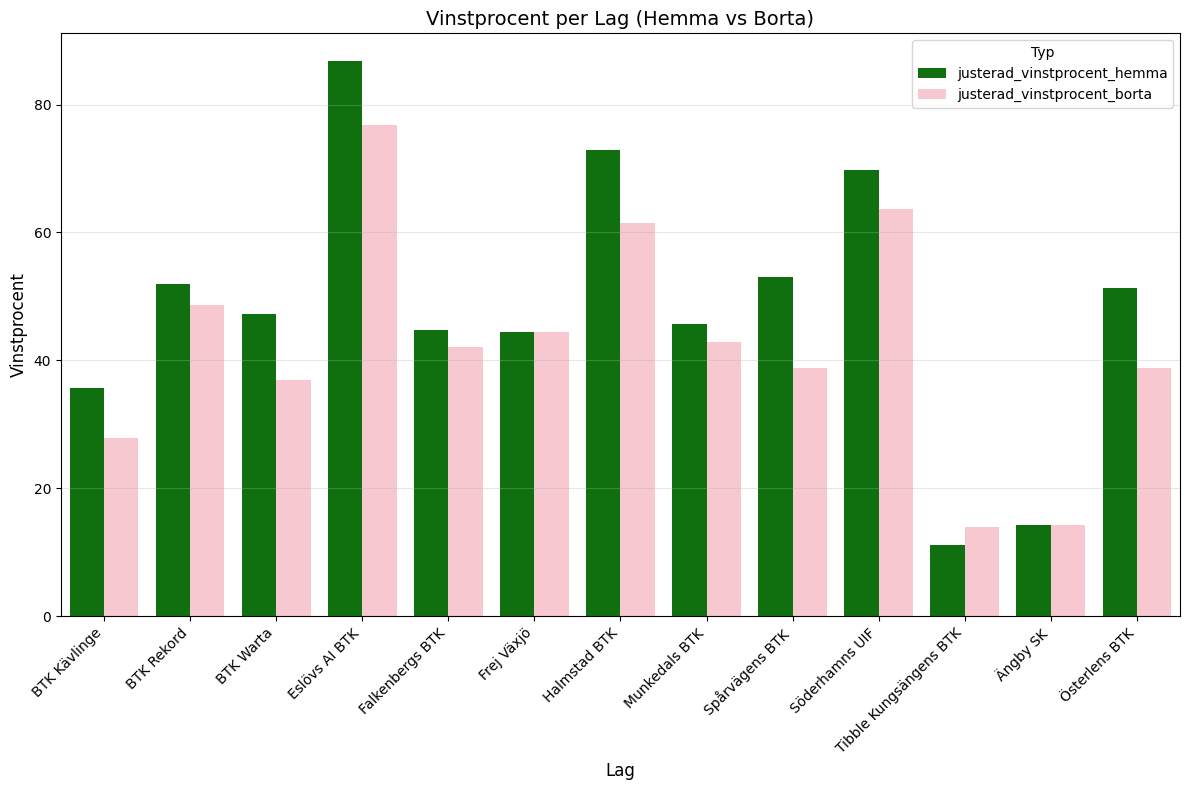

T-statistik för vinstprocent hemma vs borta: 2.4718241821842915
P-värde för vinstprocent hemma vs borta: 0.014183344684292505


In [64]:
# Beräkna "justerad" hemmavinst genom att räkna oavgjorda matcher som en halv vinst
df['justerad_hemmavinst'] = df['Hemmavinst'] + 0.5 * df['Oavgjort Hemma']

# Beräkna "justerad" bortavinst genom att räkna oavgjorda matcher som en halv vinst
df['justerad_bortavinst'] = df['Bortavinst'] + 0.5 * df['Oavgjort Borta']

# Beräkna totalt antal matcher spelade hemma (vinst, oavgjort och förlust)
df['total_matcher_hemma'] = df['Hemmavinst'] + df['Oavgjort Hemma'] + df['Hemmaförlust']

# Beräkna totalt antal matcher spelade borta (vinst, oavgjort och förlust)
df['total_matcher_borta'] = df['Bortavinst'] + df['Oavgjort Borta'] + df['Bortaförlust']

# Beräkna justerad vinstprocent hemma genom att dividera justerade hemmavinster med totala hemmamatcher och multiplicera med 100
df['justerad_vinstprocent_hemma'] = df['justerad_hemmavinst'] / df['total_matcher_hemma'] * 100

# Beräkna justerad vinstprocent borta genom att dividera justerade bortavinster med totala bortamatcher och multiplicera med 100
df['justerad_vinstprocent_borta'] = df['justerad_bortavinst'] / df['total_matcher_borta'] * 100

# Beräkna genomsnittlig vinstprocent hemma och borta per lag
vinstprocent_per_lag = df.groupby('Lag')[['justerad_vinstprocent_hemma', 'justerad_vinstprocent_borta']].mean()

# Konvertera till långformat för seaborn
vinstprocent_per_lag = vinstprocent_per_lag.reset_index().melt(id_vars='Lag', 
                                                              var_name='Typ', 
                                                              value_name='Vinstprocent')

# Plotta barplot med seaborn
plt.figure(figsize=(12, 8))
sns.barplot(
    x='Lag',
    y='Vinstprocent',
    hue='Typ',
    data=vinstprocent_per_lag,
    palette=['green', 'pink']
)

# Anpassa plottens utseende
plt.title('Vinstprocent per Lag (Hemma vs Borta)', fontsize=14)
plt.xlabel('Lag', fontsize=12)
plt.ylabel('Vinstprocent', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Typ', loc='upper right')
plt.tight_layout()
plt.grid(axis='y', alpha=0.3)
plt.show()

# Filtrera data för vinstprocent hemma och borta
vinstprocent_hemma = df['justerad_vinstprocent_hemma']
vinstprocent_borta = df['justerad_vinstprocent_borta']

# Utför t-test för att jämföra vinstprocent hemma och borta
t_stat_hemma_borta, p_value_hemma_borta = ttest_ind(vinstprocent_hemma, vinstprocent_borta, equal_var=False)

# Visa resultaten
print(f"T-statistik för vinstprocent hemma vs borta: {t_stat_hemma_borta}")
print(f"P-värde för vinstprocent hemma vs borta: {p_value_hemma_borta}")





# Räkna ut de lag med högst vinstkvot (hemma/borta) Herrar

In [65]:
# Filtrera bort rader där justerad_vinstprocent_borta är 0
df = df[df['justerad_vinstprocent_borta'] > 0]

# Beräkna vinstkvot (hemma/borta) igen
df['vinstkvot'] = df['justerad_vinstprocent_hemma'] / df['justerad_vinstprocent_borta']

# Top 5 lag med högst vinstkvot hemma kontra borta
top_5_vinstkvot = df.groupby('Lag')['vinstkvot'].mean().sort_values(ascending=False).head(5)
top_5_vinstkvot.head(5)



Lag
Spårvägens BTK    1.989011
BTK Kävlinge      1.651515
Österlens BTK     1.445238
BTK Warta         1.360714
Halmstad BTK      1.357086
Name: vinstkvot, dtype: float64

# Räkna ut de lag med högst vinstkvot innan/ efter 2016 Herrar

In [123]:
# Ange sökvägen till filen
file_path = '/Users/wilmaberglund/pingisliganherrar.csv'

# Läs in CSV-filen
df = pd.read_csv(file_path)

# Beräkna justerade vinster
df['justerad_hemmavinst'] = df['Hemmavinst'] + 0.5 * df['Oavgjort Hemma']
df['justerad_bortavinst'] = df['Bortavinst'] + 0.5 * df['Oavgjort Borta']

# Beräkna totalt antal matcher
df['total_matcher_hemma'] = df['Hemmavinst'] + df['Oavgjort Hemma'] + df['Hemmaförlust']
df['total_matcher_borta'] = df['Bortavinst'] + df['Oavgjort Borta'] + df['Bortaförlust']

# Beräkna justerad vinstprocent
df['justerad_vinstprocent_hemma'] = df['justerad_hemmavinst'] / df['total_matcher_hemma'] * 100
df['justerad_vinstprocent_borta'] = df['justerad_bortavinst'] / df['total_matcher_borta'] * 100

# Extrahera startåret från säsong
df['Startår'] = df['Säsong'].str.split('/').str[0].astype(int)

# Skapa kolumn för period
df['Period'] = df['Startår'].apply(lambda x: 'Före 2016' if x < 2016 else 'Efter 2016')

# Ta bort rader där justerad_vinstprocent_borta är 0
df = df[df['justerad_vinstprocent_borta'] > 0]

# Beräkna vinstkvot (hemma/borta)
df['vinstkvot'] = df['justerad_vinstprocent_hemma'] / df['justerad_vinstprocent_borta']

# Top 5 lag före 2016
top_5_före_2016 = (
    df[df['Period'] == 'Före 2016']
    .groupby('Lag')['vinstkvot']
    .mean()
    .sort_values(ascending=False)
    .head(5)
)

# Top 5 lag efter 2016
top_5_efter_2016 = (
    df[df['Period'] == 'Efter 2016']
    .groupby('Lag')['vinstkvot']
    .mean()
    .sort_values(ascending=False)
    .head(5)
)

# Lista av top 5 lag efter 2016
top_5_lag = top_5_efter_2016.index
print('Top 5 lag i vinstkvot före 2016:')
print(top_5_före_2016)
print('Top 5 lag i vinstkvot efter 2016:')
print(top_5_efter_2016)




Top 5 lag i vinstkvot före 2016:
Lag
Österlens BTK      1.519444
BTK Warta          1.488889
Falkenbergs BTK    1.428968
Halmstad BTK       1.325661
Spårvägens BTK     1.277778
Name: vinstkvot, dtype: float64
Top 5 lag i vinstkvot efter 2016:
Lag
Spårvägens BTK    2.598639
BTK Kävlinge      1.916667
Halmstad BTK      1.380655
Söderhamns UIF    1.297569
Eslövs AI BTK     1.275397
Name: vinstkvot, dtype: float64


# Herrar vinstkvot innan och efter 20216

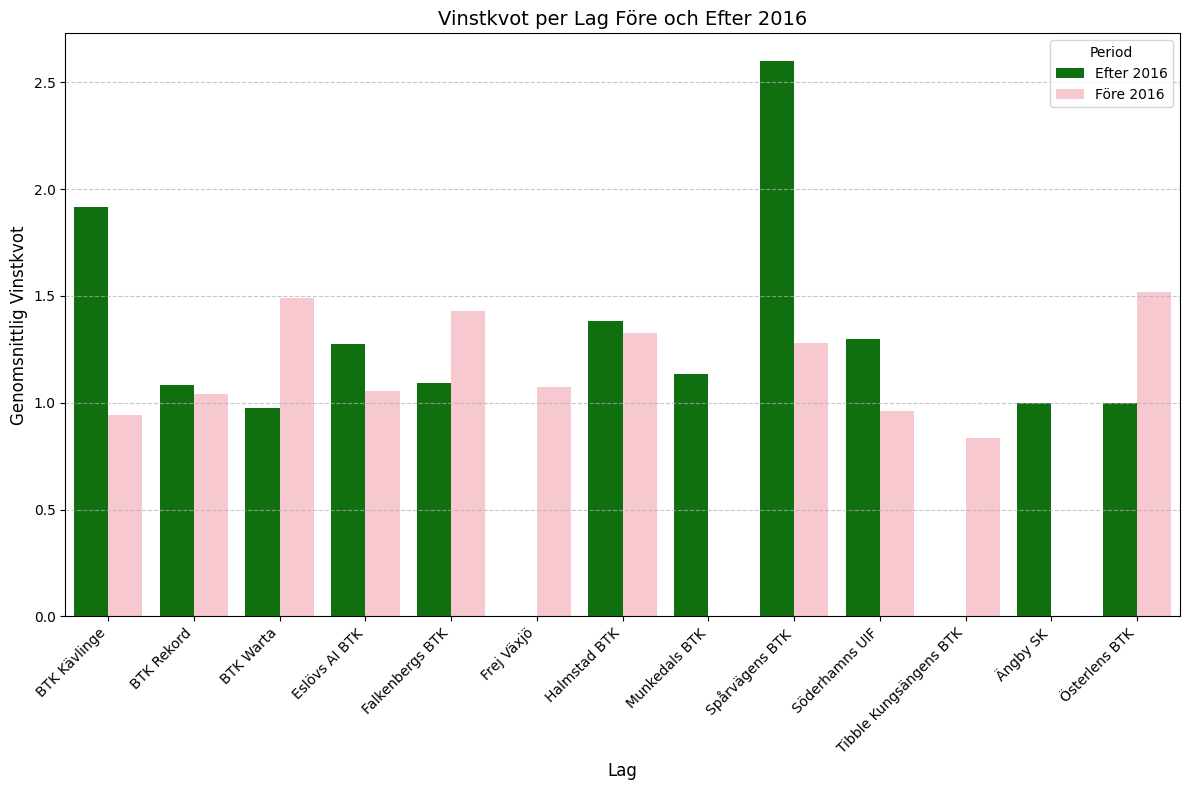

In [83]:
# Extrahera startåret från säsong
df['Startår'] = df['Säsong'].str.split('/').str[0].astype(int)
df['Period'] = df['Startår'].apply(lambda x: 'Före 2016' if x < 2016 else 'Efter 2016')

# Ta bort rader där justerad_vinstprocent_hemma eller justerad_vinstprocent_borta är noll
df = df[(df['justerad_vinstprocent_hemma'] > 0) & (df['justerad_vinstprocent_borta'] > 0)]

# Beräkna vinstkvot per lag och period
vinstkvot_per_lag = df.groupby(['Lag', 'Period'])['vinstkvot'].mean().unstack()

# Konvertera till långformat för Seaborn
vinstkvot_per_lag = vinstkvot_per_lag.reset_index().melt(
    id_vars='Lag', 
    var_name='Period', 
    value_name='Vinstkvot'
)

# Skapa en barplot med Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(
    x='Lag',
    y='Vinstkvot',
    hue='Period',
    data=vinstkvot_per_lag,
    palette=['green', 'pink']
)

# Anpassa plottens utseende
plt.title('Vinstkvot per Lag Före och Efter 2016', fontsize=14)
plt.xlabel('Lag', fontsize=12)
plt.ylabel('Genomsnittlig Vinstkvot', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Test för alla lag herrar innan och efter 2016 

In [26]:
# Beräkna genomsnittlig vinstprocent hemma före och efter 2016 för alla lag
vinstprocent_före_2016 = df[df['Period'] == 'Före 2016']['justerad_vinstprocent_hemma']
vinstprocent_efter_2016 = df[df['Period'] == 'Efter 2016']['justerad_vinstprocent_hemma']

# Utför t-test för att jämföra vinstprocenten
t_stat, p_value = ttest_ind(vinstprocent_före_2016, vinstprocent_efter_2016, equal_var=False)

# Visa resultaten
print(f"T-statistik: {t_stat}")
print(f"P-värde: {p_value}")



T-statistik: -0.5721988623464529
P-värde: 0.5683407757008141


# Förändring innan och efter 2016

In [28]:
# Extrahera startåret från säsong
df['Startår'] = df['Säsong'].str.split('/').str[0].astype(int)

# Skapa kolumn för period
df['Period'] = df['Startår'].apply(lambda x: 'Före 2016' if x < 2016 else 'Efter 2016')

# Gruppmedelvärde för vinstprocent hemma per lag och period
förbättring = df.groupby(['Lag', 'Period'])['justerad_vinstprocent_hemma'].mean().unstack()

# Beräkna förändring mellan perioderna
förbättring['Förändring'] = förbättring['Efter 2016'] - förbättring['Före 2016']

# Sortera efter förbättring
förbättring = förbättring.sort_values('Förändring', ascending=False).dropna()

# Visa resultaten
print("Lag med fullständig data för Före och Efter 2016:")
förbättring.head(16)



Lag med fullständig data för Före och Efter 2016:


Period,Efter 2016,Före 2016,Förändring
Lag,,,
Spårvägens BTK,65.306122,38.756614,26.549509
BTK Kävlinge,39.285714,24.444444,14.841270
Söderhamns UIF,72.321429,66.269841,6.051587
BTK Rekord,53.061224,50.000000,3.061224
Eslövs AI BTK,87.500000,85.846561,1.653439
BTK Warta,46.428571,47.486772,-1.058201
Halmstad BTK,66.964286,80.687831,-13.723545
Falkenbergs BTK,30.952381,51.190476,-20.238095
Österlens BTK,14.285714,57.539683,-43.253968


# Trend för Spårvägens BTK

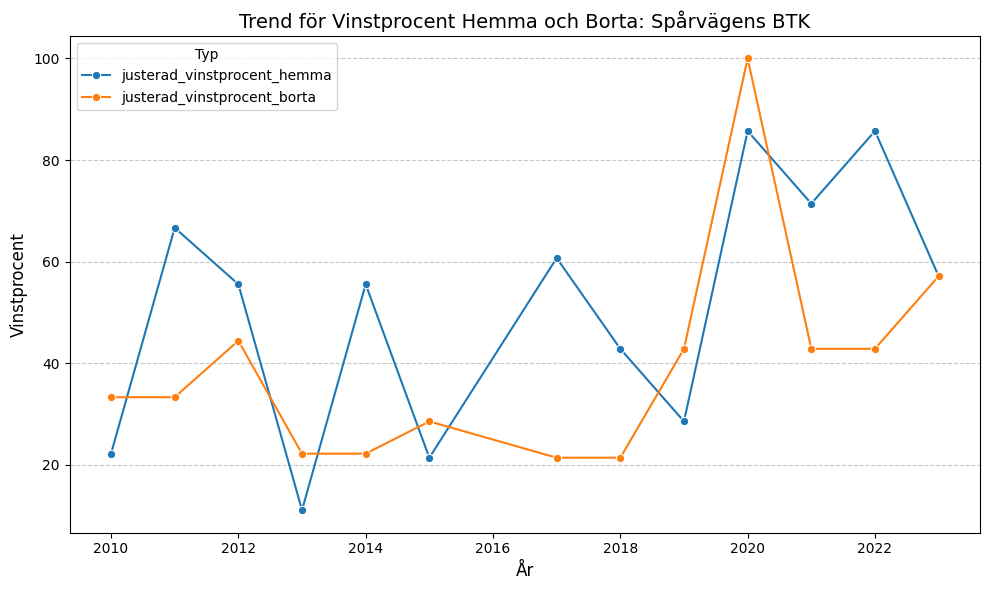

In [92]:
# Ange sökvägen till filen
file_path = '/Users/wilmaberglund/pingisliganherrar.csv'

# Läs in CSV-filen
df = pd.read_csv(file_path)

df_combined['justerad_bortavinst'] = df_combined['Bortavinst'] + 0.5 * df_combined['Oavgjort Borta']
df_combined['total_matcher_borta'] = df_combined['Bortavinst'] + df_combined['Oavgjort Borta'] + df_combined['Bortaförlust']
df_combined['justerad_vinstprocent_borta'] = df_combined['justerad_bortavinst'] / df_combined['total_matcher_borta'] * 100
df_combined['Startår'] = df_combined['Säsong'].str.split('/').str[0].astype(int)


# Filtrera data för Spårvägens BTK
sparvagens = df_combined[df_combined['Lag'] == 'Spårvägens BTK'].copy()

# Omvandla till långformat för Seaborn
trend_sparvagens_melted = trend_sparvagens.melt(
    id_vars='Startår', 
    var_name='Typ', 
    value_name='Vinstprocent'
)

# Skapa en lineplot med Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(
    x='Startår',
    y='Vinstprocent',
    hue='Typ',
    data=trend_sparvagens_melted,
    marker='o'
)

# Anpassa plottens utseende
plt.title('Trend för Vinstprocent Hemma och Borta: Spårvägens BTK', fontsize=14)
plt.xlabel('År', fontsize=12)
plt.ylabel('Vinstprocent', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Typ')
plt.tight_layout()
plt.show()


# Trend för falkenberg 

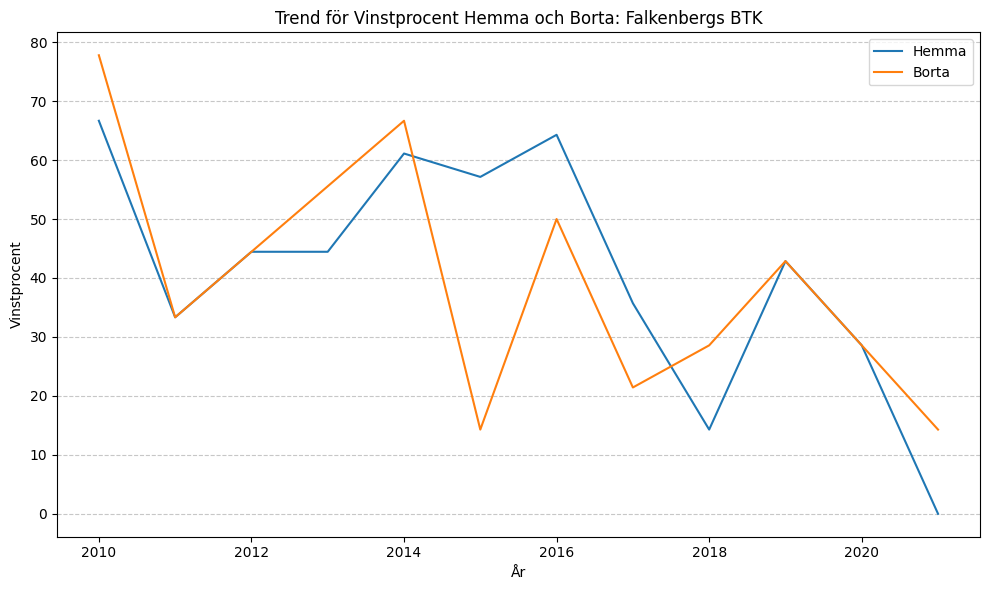

In [111]:
# Filtrera data för Falkenbergs BTK
falkenberg = df_combined[df_combined['Lag'] == 'Falkenbergs BTK'].copy()

# Skapa en linjeplot för att visa trenden
trend_falkenberg.plot(kind='line', figsize=(10, 6))
plt.title('Trend för Vinstprocent Hemma och Borta: Falkenbergs BTK')
plt.ylabel('Vinstprocent')
plt.xlabel('År')
plt.legend(['Hemma', 'Borta'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()




# Olika sponsorer innan och efter 2016

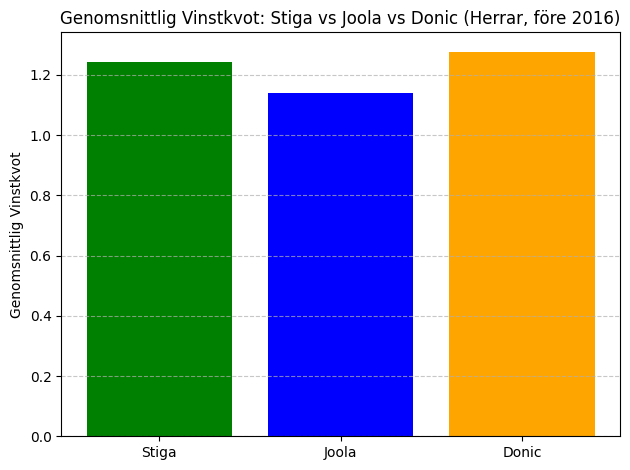

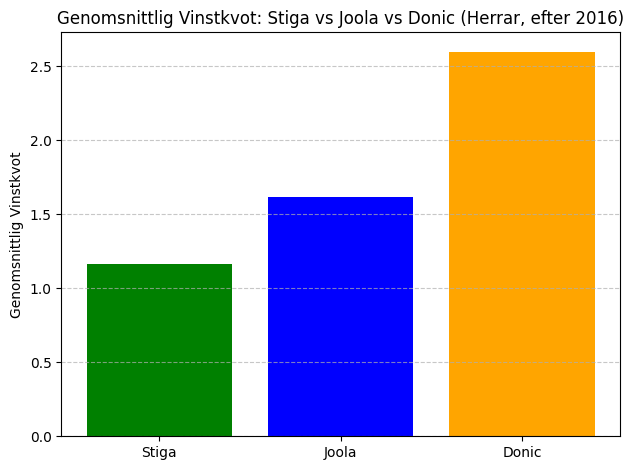

In [159]:

# Beräkna justerade vinster
herr_data['justerad_hemmavinst'] = herr_data['Hemmavinst'] + 0.5 * herr_data['Oavgjort Hemma']
herr_data['justerad_bortavinst'] = herr_data['Bortavinst'] + 0.5 * herr_data['Oavgjort Borta']

# Beräkna totalt antal matcher
herr_data['total_matcher_hemma'] = herr_data['Hemmavinst'] + herr_data['Oavgjort Hemma'] + herr_data['Hemmaförlust']
herr_data['total_matcher_borta'] = herr_data['Bortavinst'] + herr_data['Oavgjort Borta'] + herr_data['Bortaförlust']

# Beräkna vinstkvot och hantera division med noll
herr_data['vinstkvot'] = herr_data.apply(
    lambda row: row['justerad_hemmavinst'] / row['justerad_bortavinst'] if row['justerad_bortavinst'] > 0 else 0,
    axis=1
)

# Extrahera startåret från säsong
herr_data['Startår'] = herr_data['Säsong'].str.split('/').str[0].astype(int)

# Lägg till sponsorinformation
sponsors = {
    'BTK Kävlinge': 'Joola',
    'Spårvägens BTK': 'Donic',
    'Eslövs AI BTK': 'Stiga',
    'Halmstad BTK': 'Stiga',
    'Söderhamns UIF': 'Stiga',
    'BTK Rekord': 'Stiga',
    'BTK Warta': 'Stiga',
    'Falkenbergs BTK': 'Stiga',
    'Frej Växjö': 'Yasaka',
    'Lyckeby BTK': 'Yasaka',
    'Munkedals BTK': 'Stiga',
    'Tibble Kungsängens BTK': 'Yasaka',
    'Västers BTK': 'Butterfly',
    'Ängby SK': 'Butterfly',
    'Österlens BTK': 'Butterfly'
}

herr_data['Sponsor'] = herr_data['Lag'].map(sponsors)

# Filtrera bort rader där sponsor är NaN
herr_data = herr_data.dropna(subset=['Sponsor'])

# Separera data före och efter 2016
before_2016 = herr_data[herr_data['Startår'] <= 2016]
after_2016 = herr_data[herr_data['Startår'] > 2016]

# Rensa `inf` och `NaN` från vinstkvot
before_2016 = before_2016.replace([float('inf'), -float('inf')], 0).dropna(subset=['vinstkvot'])
after_2016 = after_2016.replace([float('inf'), -float('inf')], 0).dropna(subset=['vinstkvot'])

# Separera sponsorer för analys före 2016
stiga_vinstkvot_before = before_2016[before_2016['Sponsor'] == 'Stiga']['vinstkvot']
joola_vinstkvot_before = before_2016[before_2016['Sponsor'] == 'Joola']['vinstkvot']
donic_vinstkvot_before = before_2016[before_2016['Sponsor'] == 'Donic']['vinstkvot']


# Plotta jämförelse före 2016
means_before = {
    'Stiga': stiga_vinstkvot_before.mean() if len(stiga_vinstkvot_before) > 0 else 0,
    'Joola': joola_vinstkvot_before.mean() if len(joola_vinstkvot_before) > 0 else 0,
    'Donic': donic_vinstkvot_before.mean() if len(donic_vinstkvot_before) > 0 else 0
}

plt.bar(means_before.keys(), means_before.values(), color=['green', 'blue', 'orange'])
plt.title('Genomsnittlig Vinstkvot: Stiga vs Joola vs Donic (Herrar, före 2016)')
plt.ylabel('Genomsnittlig Vinstkvot')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Separera sponsorer för analys efter 2016
stiga_vinstkvot_after = after_2016[after_2016['Sponsor'] == 'Stiga']['vinstkvot']
joola_vinstkvot_after = after_2016[after_2016['Sponsor'] == 'Joola']['vinstkvot']
donic_vinstkvot_after = after_2016[after_2016['Sponsor'] == 'Donic']['vinstkvot']



# Plotta jämförelse efter 2016
means_after = {
    'Stiga': stiga_vinstkvot_after.mean() if len(stiga_vinstkvot_after) > 0 else 0,
    'Joola': joola_vinstkvot_after.mean() if len(joola_vinstkvot_after) > 0 else 0,
    'Donic': donic_vinstkvot_after.mean() if len(donic_vinstkvot_after) > 0 else 0
}

plt.bar(means_after.keys(), means_after.values(), color=['green', 'blue', 'orange'])
plt.title('Genomsnittlig Vinstkvot: Stiga vs Joola vs Donic (Herrar, efter 2016)')
plt.ylabel('Genomsnittlig Vinstkvot')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()




# Plot och test för coronasäsongen 2020/2021 utan publik

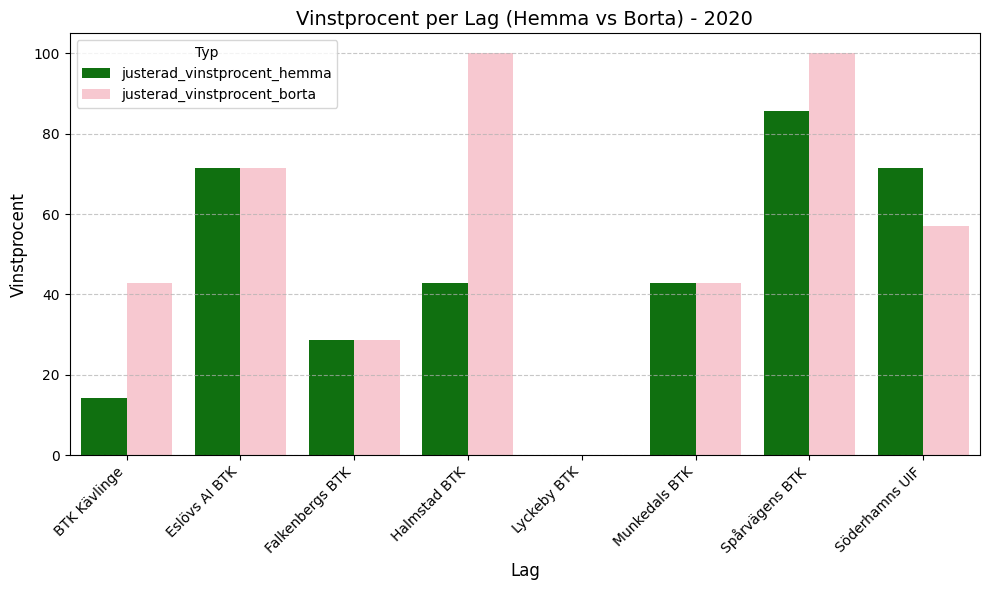

T-test för vinstkvot mellan 2020 och alla andra år:
T-statistik: -3.2736250753386464
P-värde: 0.004729728105765621


In [122]:
# Ange sökvägen till filen
file_path = '/Users/wilmaberglund/pingisliganherrar.csv'

# Läs in CSV-filen
df = pd.read_csv(file_path)

# Beräkna "justerad" hemmavinst genom att räkna oavgjorda matcher som en halv vinst
df['justerad_hemmavinst'] = df['Hemmavinst'] + 0.5 * df['Oavgjort Hemma']

# Beräkna "justerad" bortavinst genom att räkna oavgjorda matcher som en halv vinst
df['justerad_bortavinst'] = df['Bortavinst'] + 0.5 * df['Oavgjort Borta']

# Beräkna totalt antal matcher spelade hemma (vinst, oavgjort och förlust)
df['total_matcher_hemma'] = df['Hemmavinst'] + df['Oavgjort Hemma'] + df['Hemmaförlust']

# Beräkna totalt antal matcher spelade borta (vinst, oavgjort och förlust)
df['total_matcher_borta'] = df['Bortavinst'] + df['Oavgjort Borta'] + df['Bortaförlust']

# Beräkna justerad vinstprocent hemma genom att dividera justerade hemmavinster med totala hemmamatcher och multiplicera med 100
df['justerad_vinstprocent_hemma'] = df['justerad_hemmavinst'] / df['total_matcher_hemma'] * 100

# Beräkna justerad vinstprocent borta genom att dividera justerade bortavinster med totala bortamatcher och multiplicera med 100
df['justerad_vinstprocent_borta'] = df['justerad_bortavinst'] / df['total_matcher_borta'] * 100

# Extrahera startåret från säsong
df['Startår'] = df['Säsong'].str.split('/').str[0].astype(int)

# Filtrera data för 2020
df_2020 = df[df['Startår'] == 2020].copy()

# Gruppvis medelvärde för vinstprocent per lag för 2020
df_2020_lag = df_2020.groupby('Lag')[['justerad_vinstprocent_hemma', 'justerad_vinstprocent_borta']].mean().reset_index()

# Plotta vinstprocent per lag för 2020 med Seaborn
plt.figure(figsize=(10, 6))
df_2020_lag_melted = df_2020_lag.melt(id_vars='Lag', var_name='Typ', value_name='Vinstprocent')
sns.barplot(
    x='Lag',
    y='Vinstprocent',
    hue='Typ',
    data=df_2020_lag_melted,
    palette=['green', 'pink']
)
plt.title('Vinstprocent per Lag (Hemma vs Borta) - 2020', fontsize=14)
plt.xlabel('Lag', fontsize=12)
plt.ylabel('Vinstprocent', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Filtrera data för övriga år
df_other_years = df[df['Startår'] != 2020].copy()

# Beräkna vinstkvot (hemma/borta) för 2020 och övriga år, hantera nollvärden
df_2020['vinstkvot'] = np.where(
    df_2020['justerad_vinstprocent_borta'] > 0,
    df_2020['justerad_vinstprocent_hemma'] / df_2020['justerad_vinstprocent_borta'],
    np.nan
)

df_other_years['vinstkvot'] = np.where(
    df_other_years['justerad_vinstprocent_borta'] > 0,
    df_other_years['justerad_vinstprocent_hemma'] / df_other_years['justerad_vinstprocent_borta'],
    np.nan
)

# Filtrera bort nollkvoter från båda dataset
df_2020 = df_2020.dropna(subset=['vinstkvot']).copy()
df_other_years = df_other_years.dropna(subset=['vinstkvot']).copy()

# Utför t-test mellan vinstkvoter för 2020 och övriga år
t_stat, p_value = ttest_ind(df_2020['vinstkvot'], df_other_years['vinstkvot'], equal_var=False)

# Visa resultaten
print("T-test för vinstkvot mellan 2020 och alla andra år:")
print(f"T-statistik: {t_stat}")
print(f"P-värde: {p_value}")


# Trend i vinstprocent hemma  vs borta före och efter 2016

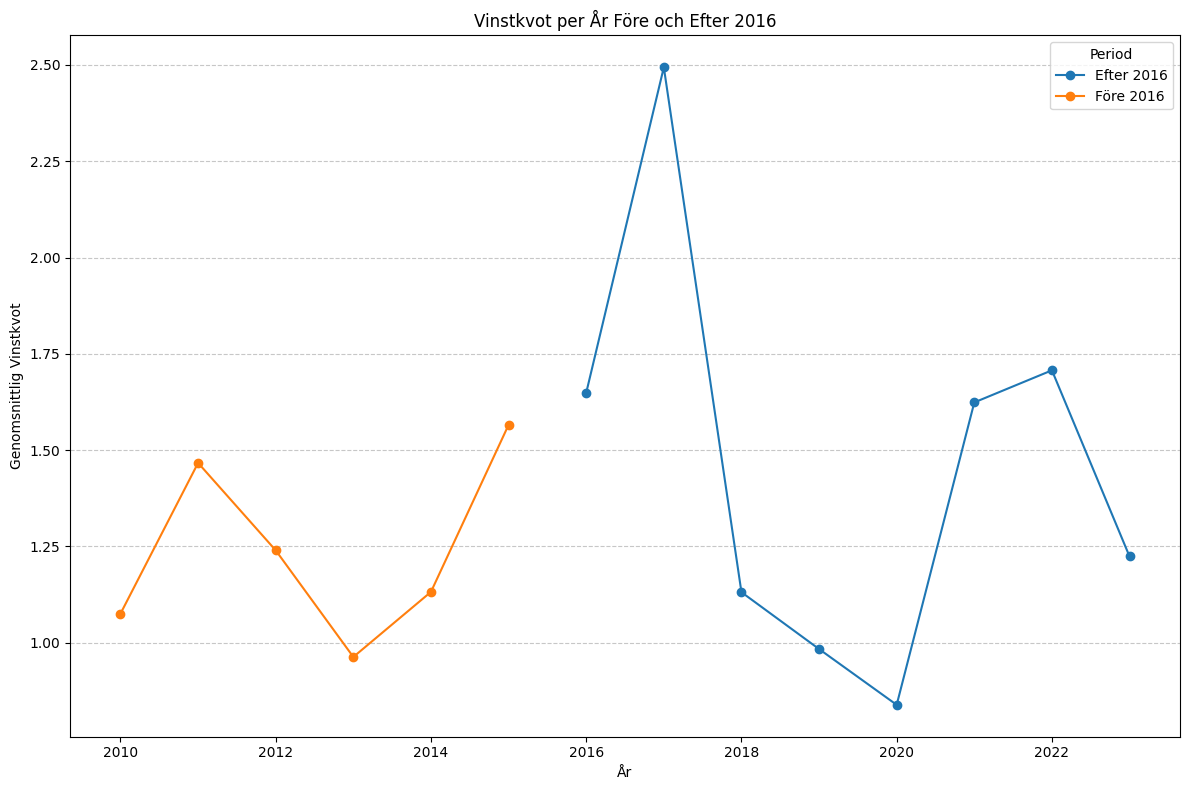

In [138]:
import pandas as pd
import matplotlib.pyplot as plt

# Ange sökvägen till filen
file_path = '/Users/wilmaberglund/pingisliganherrar.csv'

# Läs in CSV-filen
df = pd.read_csv(file_path)

# Beräkna justerade vinster
df['justerad_hemmavinst'] = df['Hemmavinst'] + 0.5 * df['Oavgjort Hemma']
df['justerad_bortavinst'] = df['Bortavinst'] + 0.5 * df['Oavgjort Borta']

# Beräkna totalt antal matcher
df['total_matcher_hemma'] = df['Hemmavinst'] + df['Oavgjort Hemma'] + df['Hemmaförlust']
df['total_matcher_borta'] = df['Bortavinst'] + df['Oavgjort Borta'] + df['Bortaförlust']

# Beräkna justerad vinstprocent
df['justerad_vinstprocent_hemma'] = df['justerad_hemmavinst'] / df['total_matcher_hemma'] * 100
df['justerad_vinstprocent_borta'] = df['justerad_bortavinst'] / df['total_matcher_borta'] * 100

# Extrahera startåret från säsong
df['Startår'] = df['Säsong'].str.split('/').str[0].astype(int)
df['Period'] = df['Startår'].apply(lambda x: 'Före 2016' if x < 2016 else 'Efter 2016')

# Ta bort rader där justerad_vinstprocent_hemma eller justerad_vinstprocent_borta är noll
df = df[(df['justerad_vinstprocent_hemma'] > 0) & (df['justerad_vinstprocent_borta'] > 0)]

# Beräkna vinstkvot (hemma/borta)
df['vinstkvot'] = df['justerad_vinstprocent_hemma'] / df['justerad_vinstprocent_borta']

# Gruppmedelvärde för vinstkvot per lag och period
vinstkvot_per_lag = df.groupby(['Startår', 'Period'])['vinstkvot'].mean().unstack()

# Skapa en linjeplot för att jämföra före och efter 2016
vinstkvot_per_lag.plot(kind='line', figsize=(12, 8), marker='o')
plt.title('Vinstkvot per År Före och Efter 2016')
plt.xlabel('År')
plt.ylabel('Genomsnittlig Vinstkvot')
plt.legend(title='Period')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()





# Tabell för pingisligan damer

In [124]:
# Ange sökvägen till filen
file_path = '/Users/wilmaberglund/pingisligandamer.csv'

# Läs in CSV-filen
df = pd.read_csv(file_path)

# Lägg till sponsorinformation
sponsors = {
    'Storfors BTK': 'Butterfly',
    'Spårvägens BTK': 'Donic',
    'Halmstad BTK': 'Stiga',
    'Köpings BTK': 'Stiga',
    'BTK Frej': 'Yasaka',
    'Dänningelanda BTK': 'Stiga',
    'Eskilstuna BTK': 'Stiga',
    'Arvika BTK': 'Stiga',
    'Eslövs PK': 'Stiga',
    'IK Juno': 'Butterfly',
    'Lekstorps IF': 'Yasaka',
    'Lyckeby BTK': 'Yasaka'
}

df['Sponsor'] = df['Lag'].map(sponsors)

# Visa de första raderna av data
df.head(16)



,Lag,Hemmavinst,Hemmaförlust,Bortavinst,Bortaförlust,Oavgjort Hemma,Oavgjort Borta,Säsong,Sponsor
0,Eslövs PK,4,0,4,0,1,1,2023/2024,Stiga
1,Köpings BTK,2,2,3,0,1,2,2023/2024,Stiga
2,BTK Frej,3,0,1,1,2,3,2023/2024,Yasaka
3,Halmstad BTK,2,2,2,2,1,1,2023/2024,Stiga
4,IK Juno,0,5,0,5,0,0,2023/2024,Butterfly
5,Eslövs PK,6,1,7,0,0,0,2022/2023,Stiga
6,Köpings BTK,6,1,6,1,0,0,2022/2023,Stiga
7,IK Juno,6,1,3,4,0,0,2022/2023,Butterfly
8,Halmstad BTK,5,2,4,3,0,0,2022/2023,Stiga
9,Lekstorps IF,3,4,2,5,0,0,2022/2023,Yasaka


# Vinstprocent hemma vs borta per lag damer

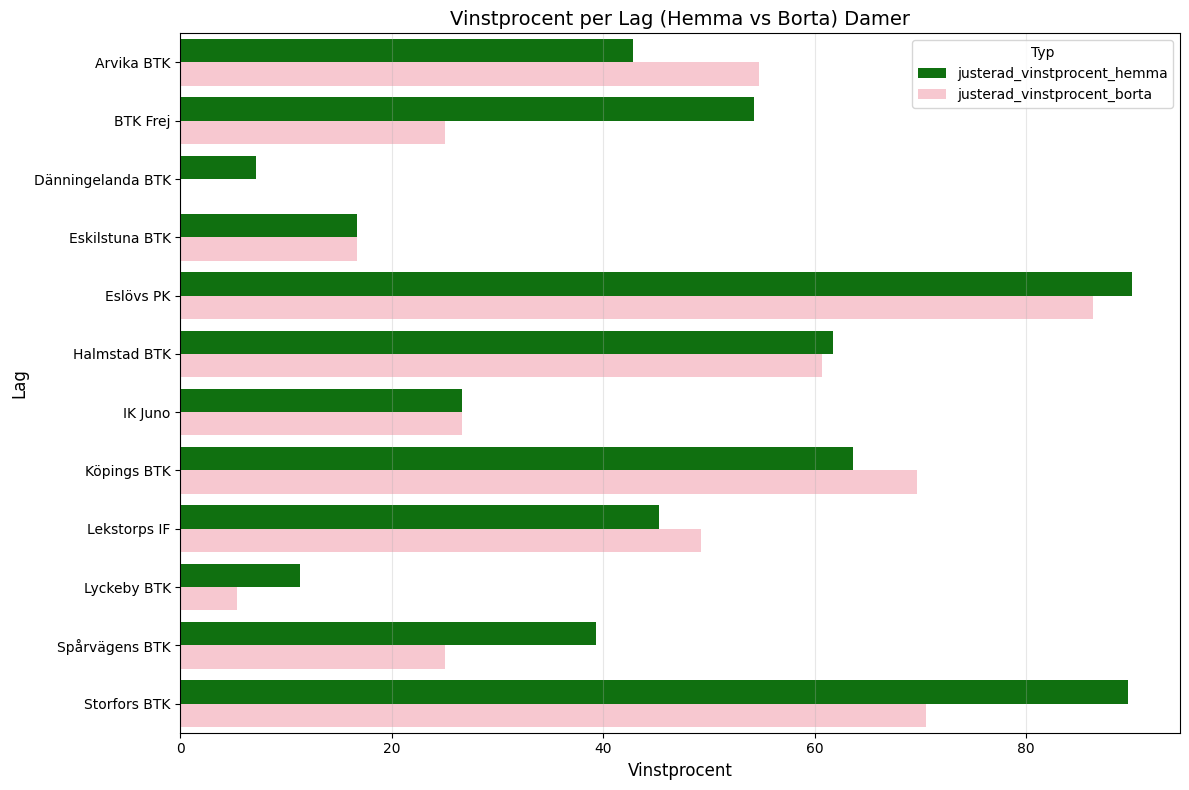

T-statistik för vinstprocent hemma vs borta: 0.39689812397982666
P-värde för vinstprocent hemma vs borta: 0.6923434528596428


In [126]:
# Beräkna "justerad" hemmavinst genom att räkna oavgjorda matcher som en halv vinst
df['justerad_hemmavinst'] = df['Hemmavinst'] + 0.5 * df['Oavgjort Hemma']

# Beräkna "justerad" bortavinst genom att räkna oavgjorda matcher som en halv vinst
df['justerad_bortavinst'] = df['Bortavinst'] + 0.5 * df['Oavgjort Borta']

# Beräkna totalt antal matcher spelade hemma (vinst, oavgjort och förlust)
df['total_matcher_hemma'] = df['Hemmavinst'] + df['Oavgjort Hemma'] + df['Hemmaförlust']

# Beräkna totalt antal matcher spelade borta (vinst, oavgjort och förlust)
df['total_matcher_borta'] = df['Bortavinst'] + df['Oavgjort Borta'] + df['Bortaförlust']

# Beräkna justerad vinstprocent hemma genom att dividera justerade hemmavinster med totala hemmamatcher och multiplicera med 100
df['justerad_vinstprocent_hemma'] = df['justerad_hemmavinst'] / df['total_matcher_hemma'] * 100

# Beräkna justerad vinstprocent borta genom att dividera justerade bortavinster med totala bortamatcher och multiplicera med 100
df['justerad_vinstprocent_borta'] = df['justerad_bortavinst'] / df['total_matcher_borta'] * 100

# Beräkna genomsnittlig vinstprocent hemma och borta per lag
vinstprocent_per_lag = df.groupby('Lag')[['justerad_vinstprocent_hemma', 'justerad_vinstprocent_borta']].mean()

# Konvertera till långformat för seaborn
vinstprocent_per_lag = vinstprocent_per_lag.reset_index().melt(id_vars='Lag', 
                                                              var_name='Typ', 
                                                              value_name='Vinstprocent')

# Plotta barplot med seaborn
plt.figure(figsize=(12, 8))
sns.barplot(
    x='Vinstprocent',
    y='Lag',
    hue='Typ',
    data=vinstprocent_per_lag,
    palette=['green', 'pink'],
    orient='h'
)

# Anpassa plottens utseende
plt.title('Vinstprocent per Lag (Hemma vs Borta) Damer', fontsize=14)
plt.xlabel('Vinstprocent', fontsize=12)
plt.ylabel('Lag', fontsize=12)
plt.legend(title='Typ', loc='upper right')
plt.tight_layout()
plt.grid(axis='x', alpha=0.3)
plt.show()

# Filtrera data för vinstprocent hemma och borta
vinstprocent_hemma = df['justerad_vinstprocent_hemma']
vinstprocent_borta = df['justerad_vinstprocent_borta']

# Utför t-test för att jämföra vinstprocent hemma och borta
t_stat_hemma_borta, p_value_hemma_borta = ttest_ind(vinstprocent_hemma, vinstprocent_borta, equal_var=False)

# Visa resultaten
print(f"T-statistik för vinstprocent hemma vs borta: {t_stat_hemma_borta}")
print(f"P-värde för vinstprocent hemma vs borta: {p_value_hemma_borta}")



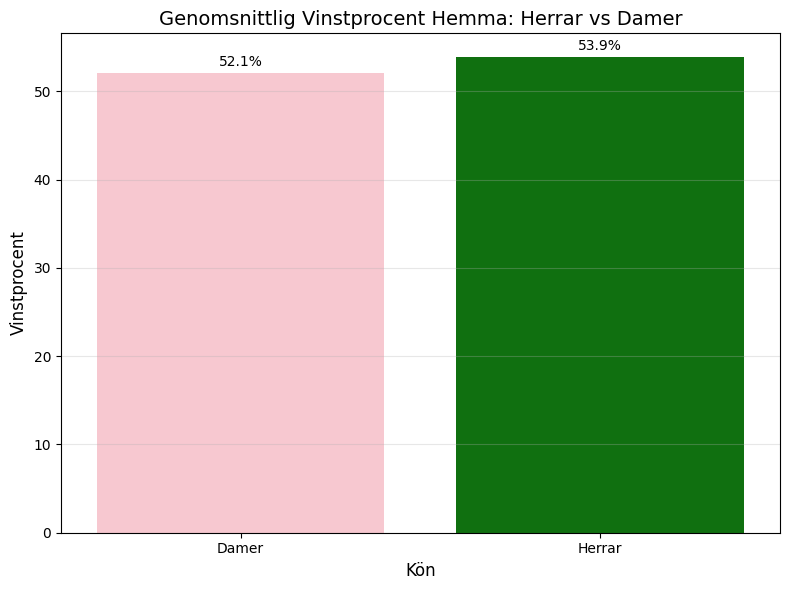

In [131]:
# Beräkna "justerad" hemmavinst genom att räkna oavgjorda matcher som en halv vinst
df['justerad_hemmavinst'] = df['Hemmavinst'] + 0.5 * df['Oavgjort Hemma']

# Beräkna "justerad" bortavinst genom att räkna oavgjorda matcher som en halv vinst
df['justerad_bortavinst'] = df['Bortavinst'] + 0.5 * df['Oavgjort Borta']

# Beräkna totalt antal matcher spelade hemma (vinst, oavgjort och förlust)
df['total_matcher_hemma'] = df['Hemmavinst'] + df['Oavgjort Hemma'] + df['Hemmaförlust']

# Beräkna totalt antal matcher spelade borta (vinst, oavgjort och förlust)
df['total_matcher_borta'] = df['Bortavinst'] + df['Oavgjort Borta'] + df['Bortaförlust']

# Beräkna justerad vinstprocent hemma genom att dividera justerade hemmavinster med totala hemmamatcher och multiplicera med 100
df['justerad_vinstprocent_hemma'] = df['justerad_hemmavinst'] / df['total_matcher_hemma'] * 100

# Beräkna justerad vinstprocent borta genom att dividera justerade bortavinster med totala bortamatcher och multiplicera med 100
df['justerad_vinstprocent_borta'] = df['justerad_bortavinst'] / df['total_matcher_borta'] * 100


# Skapa en barplot med Seaborn
plt.figure(figsize=(8, 6))
ax=sns.barplot(
    x='Kön',
    y='justerad_vinstprocent_hemma',
    data=vinstprocent_per_kön,
    hue='Kön',  # Använd hue för att specificera färgpalett
    dodge=False,  # Undvik separering av staplar
    palette=['pink', 'green']  # Färgschema för varje kön
)

# Lägg till värden ovanför staplarna
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', padding=3)


# Anpassa plottens utseende
plt.title('Genomsnittlig Vinstprocent Hemma: Herrar vs Damer', fontsize=14)
plt.xlabel('Kön', fontsize=12)
plt.ylabel('Vinstprocent', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


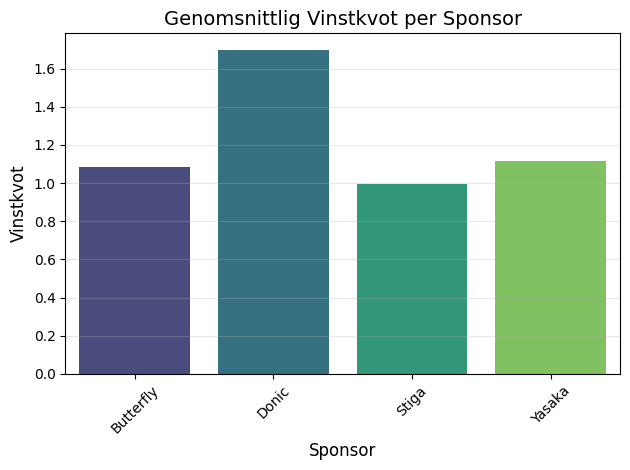

In [137]:
# Ange sökvägen till filen
file_path = '/Users/wilmaberglund/pingisligandamer.csv'

# Läs in CSV-filen
df = pd.read_csv(file_path)

# Lägg till sponsorinformation
sponsors = {
    'Storfors BTK': 'Butterfly',
    'Spårvägens BTK': 'Donic',
    'Halmstad BTK': 'Stiga',
    'Köpings BTK': 'Stiga',
    'BTK Frej': 'Yasaka',
    'Dänningelanda BTK': 'Stiga',
    'Eskilstuna BTK': 'Stiga',
    'Arvika BTK': 'Stiga',
    'Eslövs PK': 'Stiga',
    'IK Juno': 'Butterfly',
    'Lekstorps IF': 'Yasaka',
    'Lyckeby BTK': 'Yasaka'
}

df['Sponsor'] = df['Lag'].map(sponsors)

# Beräkna "justerad" hemmavinst genom att räkna oavgjorda matcher som en halv vinst
df['justerad_hemmavinst'] = df['Hemmavinst'] + 0.5 * df['Oavgjort Hemma']

# Beräkna "justerad" bortavinst genom att räkna oavgjorda matcher som en halv vinst
df['justerad_bortavinst'] = df['Bortavinst'] + 0.5 * df['Oavgjort Borta']

# Beräkna totalt antal matcher spelade hemma (vinst, oavgjort och förlust)
df['total_matcher_hemma'] = df['Hemmavinst'] + df['Oavgjort Hemma'] + df['Hemmaförlust']

# Beräkna totalt antal matcher spelade borta (vinst, oavgjort och förlust)
df['total_matcher_borta'] = df['Bortavinst'] + df['Oavgjort Borta'] + df['Bortaförlust']

# Beräkna justerad vinstprocent hemma genom att dividera justerade hemmavinster med totala hemmamatcher och multiplicera med 100
df['justerad_vinstprocent_hemma'] = df['justerad_hemmavinst'] / df['total_matcher_hemma'] * 100

# Beräkna justerad vinstprocent borta genom att dividera justerade bortavinster med totala bortamatcher och multiplicera med 100
df['justerad_vinstprocent_borta'] = df['justerad_bortavinst'] / df['total_matcher_borta'] * 100

df['Vinstkvot'] = np.where(
    df['justerad_vinstprocent_borta'] == 0,
    np.nan,
    df['justerad_vinstprocent_hemma'] / df['justerad_vinstprocent_borta']
)

vinstkvot_per_sponsor = df.groupby('Sponsor')['Vinstkvot'].mean().reset_index()

sns.barplot(
    x='Sponsor',
    y='Vinstkvot',
    data=vinstkvot_per_sponsor,
    palette='viridis',
    hue='Sponsor',  
    dodge=False,  
    legend=False  
)

# Anpassa utseendet
plt.title('Genomsnittlig Vinstkvot per Sponsor', fontsize=14)
plt.xlabel('Sponsor', fontsize=12)
plt.ylabel('Vinstkvot', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()

# Visa plott
plt.show()



